# MNIST - Classification

<h1 align="center">- $\infty$ -</h1> 

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("/Users/kaya/Desktop/Data Science Path/AInteresting/Titanic")

In [332]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
X = train.copy().drop("Survived", axis=1)
y = train.copy()["Survived"]

In [7]:
len (X)

891

**IF IT WAS NOT KAGGLE: Relatively small dataset so we're splitting the data into a 90/10 train/test ratio.**

In [8]:
# SKIP.
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                    #random_state=42)

## EDA

In [9]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

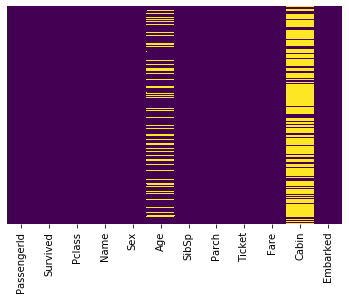

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

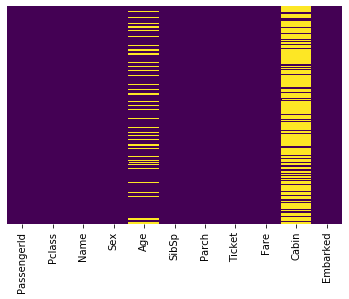

In [11]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
null_features = [feature for feature in train.columns if sum(train[feature].isnull()) > 0]

for feature in null_features:
    print("The ratio of null values for feature {} is {}".format(feature, 
          (sum(train[feature].isnull()) / len(train[feature]))))

The ratio of null values for feature Age is 0.19865319865319866
The ratio of null values for feature Cabin is 0.7710437710437711
The ratio of null values for feature Embarked is 0.002244668911335578


**Cabin feature will be dropped due to the high ratio of null values. Age and Embarked will be kept and handled.**

In [13]:
X.shape

(891, 11)

In [14]:
y.shape

(891,)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [16]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


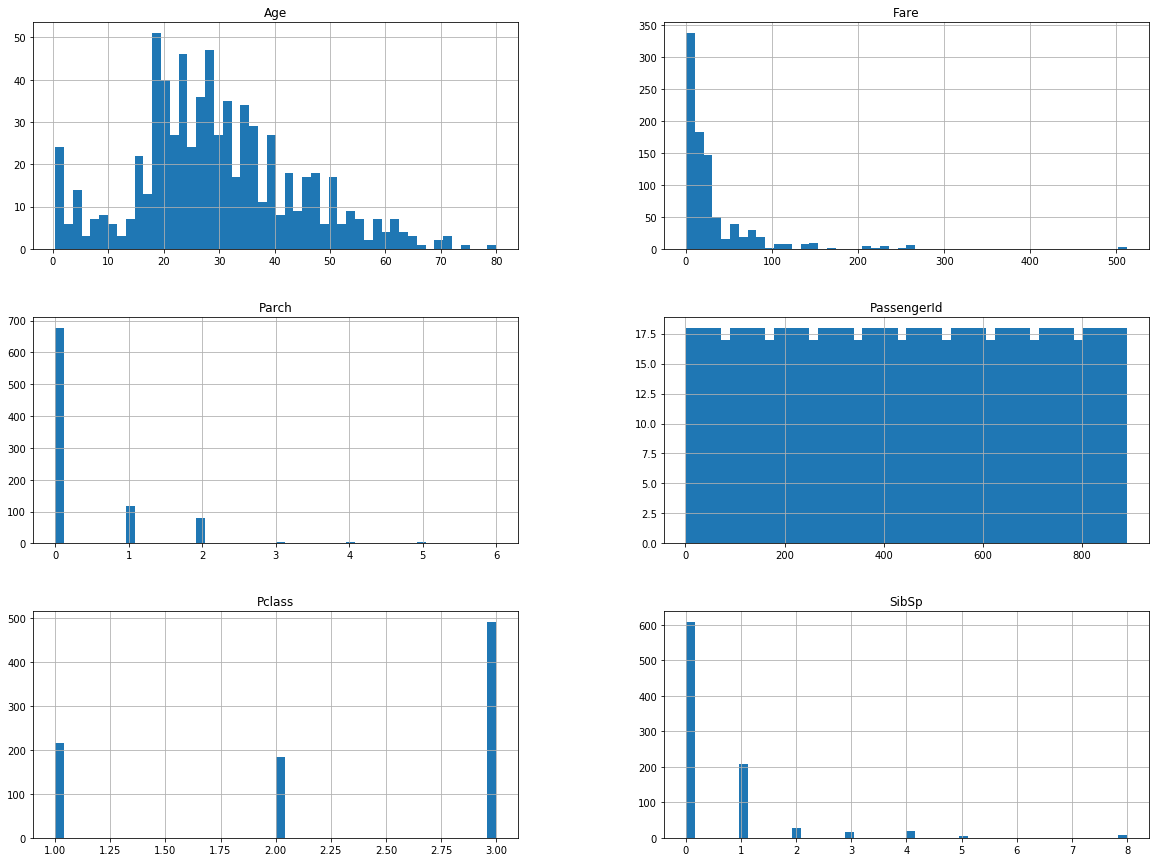

In [17]:
# Visualizing numerical features
data = X.copy()
data.hist(bins=50, figsize=(20,15))
plt.show()

**PClass is categorical, will be converted accordingly.**

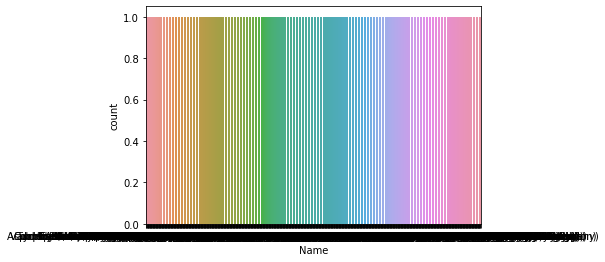

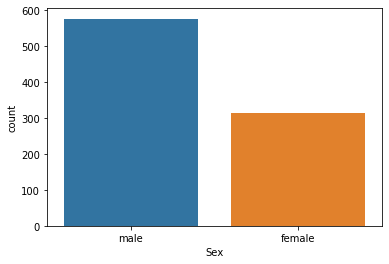

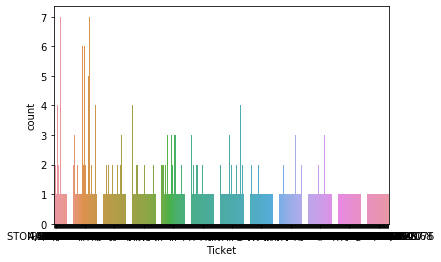

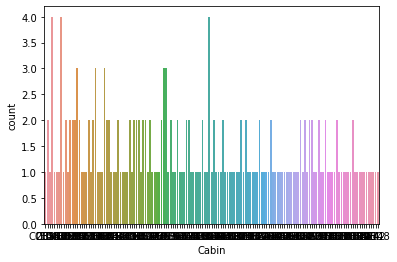

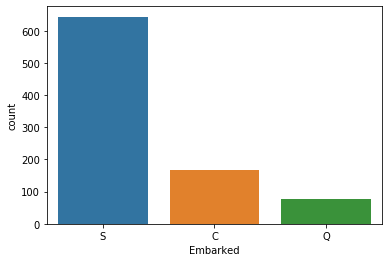

In [18]:
# Visualizing categorial features
cat_features = [feature for feature in train.columns if train[feature].dtype == "O"]

for feature in cat_features:
    data = X.copy()
    sns.countplot(data[feature])
    plt.show()

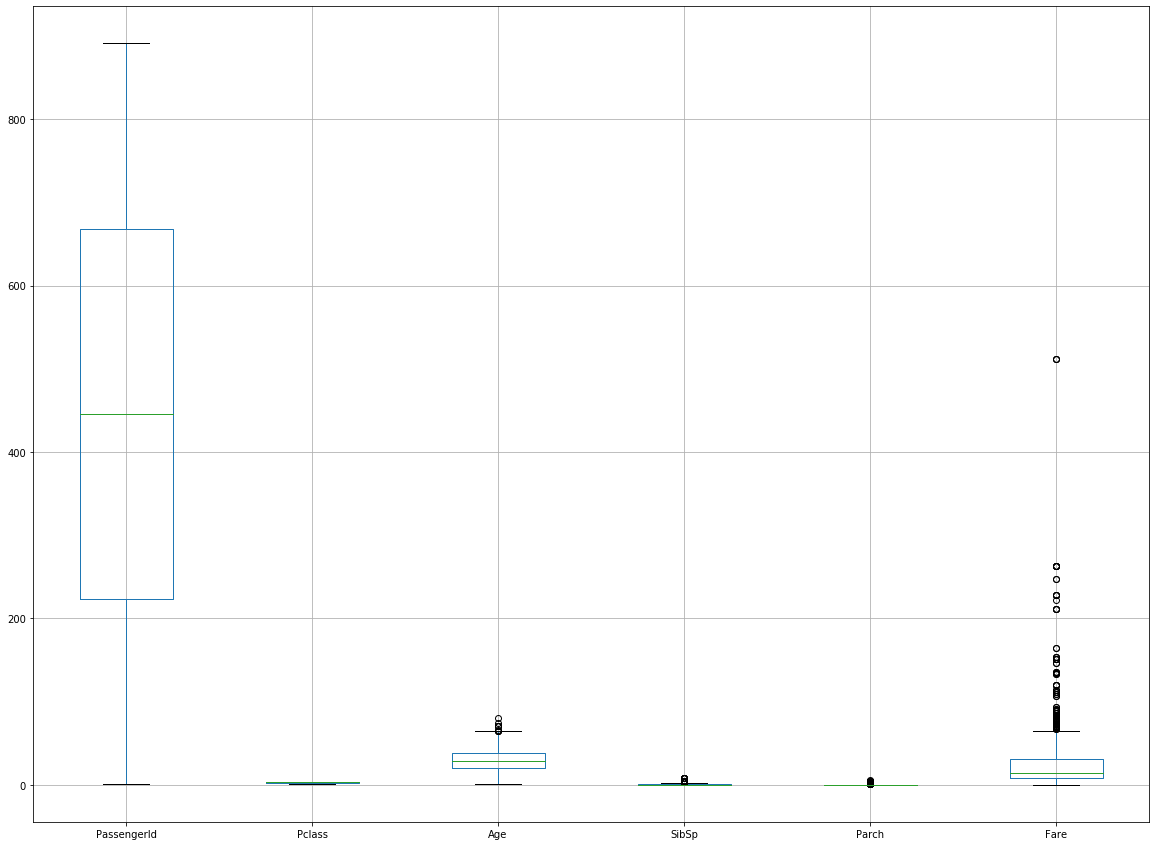

In [19]:
X.boxplot(figsize=(20,15))

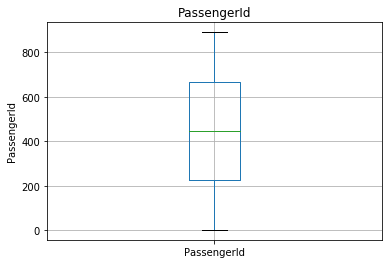

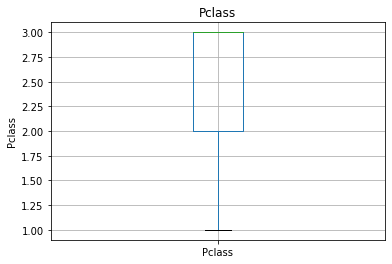

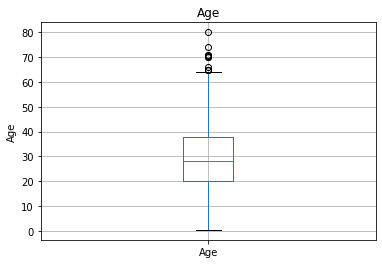

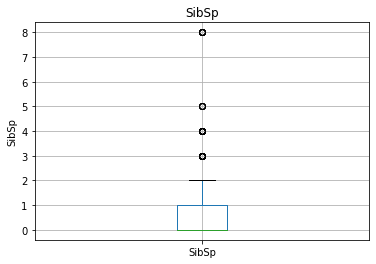

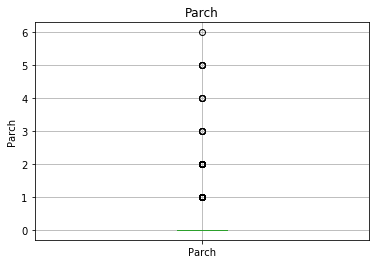

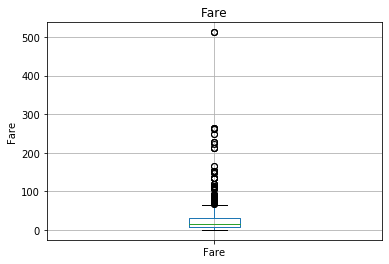

In [20]:
num_features = [feature for feature in X.columns if train[feature].dtype != "O"]

for feature in num_features:
    data = X.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [21]:
print("Age Mean: ", X["Age"].mean())
print("Age Median: ", X["Age"].median())

Age Mean:  29.69911764705882
Age Median:  28.0


**All num values have outliers so we will go with the medians. Example of age featurea above.**

In [22]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
# Correlations
data = X.copy()
corr = data.corr()
corr

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


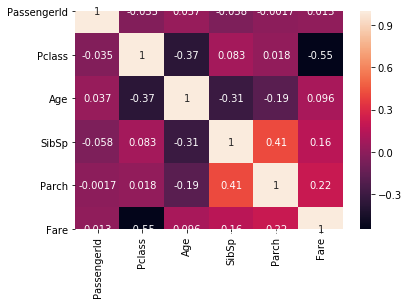

In [24]:
sns.heatmap(corr, annot=True)

## Data preparation

In [25]:
data = X.copy()

**LOOK INTO COLUMNTRANSFORMER IN FUTURE STEPS!**

### Preprocessing numerical features

Preprocessing numerical features, dropping the PassengerId feature and turning the Pclass feature into a categorical feature. Median used for the Imputer due to outliers in almost all numerical features (see boxplots above).

In [26]:
num_features

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [27]:
data[num_features].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [28]:
cat_features.append("Pclass")

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

### Preprocessing categorical features

All name/id features are dropped as well as the 'Cabin' feature due to having 77% NaN values.

In [31]:
data[cat_features].head()

,Name,Sex,Ticket,Cabin,Embarked,Pclass
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1
4,"Allen, Mr. William Henry",male,373450,NaN,S,3


In [32]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [33]:
class OneHot(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.get_dummies(X.astype(str), prefix_sep='_', drop_first=True)

In [34]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Sex", "Embarked", "Pclass"])),
        ("imputer", MostFrequentImputer()),
        ("onehot", OneHot())
    ])

### Finalizing the pre-processing pipeline

In [35]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline)
    ])

In [36]:
X = preprocess_pipeline.fit_transform(X)

In [37]:
X

array([[-0.56573646,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  1.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ]])

In [38]:
X.shape

(891, 9)

In [39]:
y.shape

(891,)

## Model Selection

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
# Trying SVC
from sklearn.svm import SVC

svc_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svc_clf, X, y, cv=10)
svm_scores.mean()

0.823816252411758

In [42]:
# Trying KNeighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X, y, cv=10)
knn_scores.mean()

0.7991209851322211

In [43]:
# Trying the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_scores = cross_val_score(rnd_clf, X, y, cv=10)
rnd_scores.mean()

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/py

0.8070749631142891

In [44]:
# Trying the Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_scores = cross_val_score(ada_clf, X, y, cv=10)
ada_scores.mean()

0.8115812620587901

In [45]:
# Trying Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_scores = cross_val_score(sgd_clf, X, y, cv=10)
sgd_scores.mean()

0.7428123935989105

In [46]:
# Trying GaussianNB
from sklearn.naive_bayes import GaussianNB 

gnb_clf = GaussianNB()
gnb_scores = cross_val_score(gnb_clf, X, y, cv=10)
gnb_scores.mean()

0.7879724208375892

In [47]:
# Trying Decision Tree
from sklearn.tree import DecisionTreeClassifier 

dt_clf = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_clf, X, y, cv=10)
dt_scores.mean()

0.7913321416411304

In [115]:
def prepare_submission(model, submission_tag, test_set, X_test):
    y_test = model.predict(X_test)
    y_test = y_test.reshape(len(y_test), 1)
    submission_file = test.copy()
    submission_file["Survived"] = y_test
    submission_file = submission_file[["PassengerId", "Survived"]]
    filename = "Submission_{}.csv".format(submission_tag)
    submission_file.to_csv(filename, index=False)
    print("Submission file '{}' saved.".format(filename))

**Model SVC (Support Vector Classifier) performed best with default values.**

In [116]:
X_test = preprocess_pipeline.fit_transform(test)

In [119]:
prepare_submission(svc_clf, "SVC_1", test, X_test)

Submission file 'Submission_SVC_1.csv' saved.


**Submitted with a 0.78229 accuracy score. Position is 3700.**

**Adaboost classifier performed second best with default values.**

In [67]:
ada_clf = AdaBoostClassifier()

In [68]:
ada_clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [120]:
prepare_submission(ada_clf, "Ada_1", test, X_test)

Submission file 'Submission_Ada_1.csv' saved.


**Submitted with a 0.74641 score.**

---------------------------------

## Hyperparamater Tuning --> GridSearchCV problematic, to be done later.

In [121]:
X = data.copy()

In [122]:
X = preprocess_pipeline.fit_transform(X)

In [123]:
X.shape

(891, 9)

In [124]:
y.shape

(891,)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_estimators': [500,1000,2000],
    'learning_rate': [.001,0.01,.1]what d
}]


ada_clf = AdaBoostClassifier()
grid_search = GridSearchCV(ada_clf, param_grid, cv=3,
                           verbose=4)
grid_search.fit(X,y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, n_estimators=500, score=0.788, total=   0.9s
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=500, score=0.801, total=   0.8s
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=500, score=0.771, total=   0.7s
[CV] learning_rate=0.001, n_estimators=1000 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=1000, score=0.788, total=   1.4s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.801, total=   2.0s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.771, total=   1.5s
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.788, total=   2.7s
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.801, total=   3.0s
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.771, total=   3.1s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV]  learning_rate=0.01, n_estimators=500, score=0.805, total=   0.7s
[CV] learning_rate=0.01, n_estimators=500 .......................

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   47.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [0.001, 0.01, 0.1],
                          'n_estimators': [500, 1000, 2000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [125]:
best_params = grid_search.best_params_

In [128]:
best_params

{'learning_rate': 0.1, 'n_estimators': 2000}

In [126]:
ada_clf = AdaBoostClassifier(**best_params)
ada_clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=2000, random_state=None)

In [127]:
prepare_submission(ada_clf, "Ada_2", test, X_test)

Submission file 'Submission_Ada_2.csv' saved.


**Scored 0.73684 with tuned hyperparameters. Overfitting?**

### Randomized grid search

In [149]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dists = {
    'n_estimators': range(0,100000),
    'learning_rate': np.arange(0, 5, 0.001)  
    }
    
ada_clf = AdaBoostClassifier()
rnd_search = RandomizedSearchCV(ada_clf, param_distributions=param_dists, n_iter=50,
                               cv=3, verbose=4, random_state=42, n_jobs=-1)
rnd_search.fit(X, y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 80.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 130.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
       4.999e+00]),
                                        'n_estimators': range(0, 100000)},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=4)

In [153]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.592885,0.045811,0.269034,0.009062,595,1.999,"{'n_estimators': 595, 'learning_rate': 1.999}",0.787879,0.747475,0.771044,0.768799,0.016571,24
1,380.050103,2.899755,44.946432,0.837600,90492,3.251,"{'n_estimators': 90492, 'learning_rate': 3.251}",0.212121,0.198653,0.228956,0.213244,0.012397,37
2,314.846203,9.802341,34.074121,2.225607,75502,2.509,"{'n_estimators': 75502, 'learning_rate': 2.509}",0.212121,0.198653,0.228956,0.213244,0.012397,37
3,128.336178,7.908279,17.696191,1.176681,35466,4.595,"{'n_estimators': 35466, 'learning_rate': 4.595}",0.212121,0.198653,0.228956,0.213244,0.012397,37
4,67.737599,0.257207,8.007691,0.064272,21863,1.275,"{'n_estimators': 21863, 'learning_rate': 1.275...",0.734007,0.727273,0.760943,0.740741,0.014547,28
5,117.028183,2.975457,21.449737,3.666487,34972,4.237,"{'n_estimators': 34972, 'learning_rate': 4.237}",0.212121,0.198653,0.228956,0.213244,0.012397,37
6,265.727220,4.260712,29.581869,0.567555,68276,4.159,"{'n_estimators': 68276, 'learning_rate': 4.159}",0.212121,0.198653,0.228956,0.213244,0.012397,37
7,78.519372,6.708443,8.856327,0.169287,24038,1.332,"{'n_estimators': 24038, 'learning_rate': 1.332}",0.727273,0.720539,0.757576,0.735129,0.016109,30
8,77.832127,0.952894,10.669935,2.230680,24377,3.042,"{'n_estimators': 24377, 'learning_rate': 3.042...",0.787879,0.801347,0.771044,0.786756,0.012397,2
9,64.946261,1.500199,7.592053,0.071572,20466,1.331,"{'n_estimators': 20466, 'learning_rate': 1.331}",0.727273,0.720539,0.767677,0.738496,0.020816,29


In [150]:
rnd_search.best_params_

{'n_estimators': 44769, 'learning_rate': 0.033}

In [151]:
prepare_submission(rnd_search.best_estimator_, "Ada_3", test, X_test)

Submission file 'Submission_Ada_3.csv' saved.


**Score is 0.72966, even worse than before the tuning.**

---------

## New transformations to improve the model.

**Will reimplement the prepare pipeline with added transformers:**
- Combine sib och parch in a good way (maybe only sum)
- Categorize age or fare?
- Look into cabin --> only higher payers got a cabin number on their ticket?
- Look into names --> any interesting prefix etc here to distinguish?
- Why isnt SVC working with gridearchcv?
- Combine features?

In [348]:
train_data = train.copy()
test_data = test.copy()

In [349]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [350]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


### Extracting Titles from Names

In [352]:
train_data["Name"].iloc[:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [334]:
class extract_titles(BaseEstimator, TransformerMixin):
    def __init__(self, status=True):
        self.status = status
    def fit(self, X, y=None):
        return self
    def extract_title(self, name):
        split_name = str.split(name, " ")
        for word in split_name:
            if word[-1] == ".":
                if word not in ["Mr.", "Mrs.", "Miss.", "Master."]:
                    word = "Other"
                return word
            else:
                pass
    def transform(self, X):
        if self.status:
            X["Title"] = X.copy()["Name"].apply(lambda x: self.extract_title(x))
            return X
        else:
            return X.copy()

In [341]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [342]:
et = extract_titles(status=True)
train_data_titles = et.fit_transform(train_data)

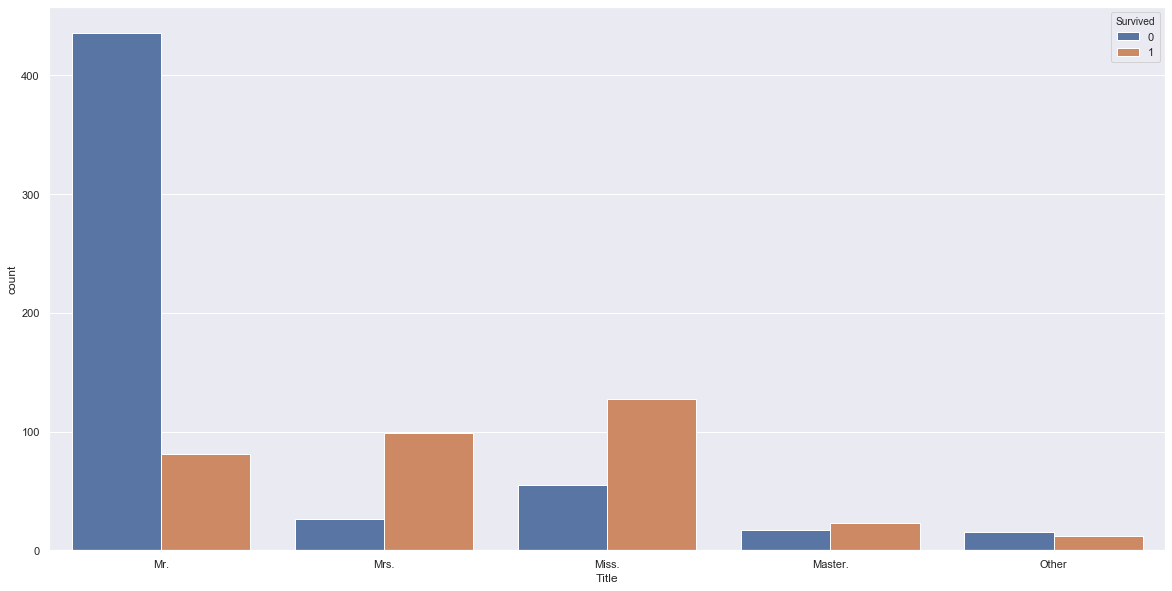

In [373]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.countplot(data=train_data_titles, x="Title", hue="Survived")
plt.show()

Interesting insight:
- Grown men had a very low chance of surviving
- Women had a good chance of surviving
- Boys and young men had a pretty good chance of surviving (over 50%)

### Combining SibSp and Parch

In [354]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


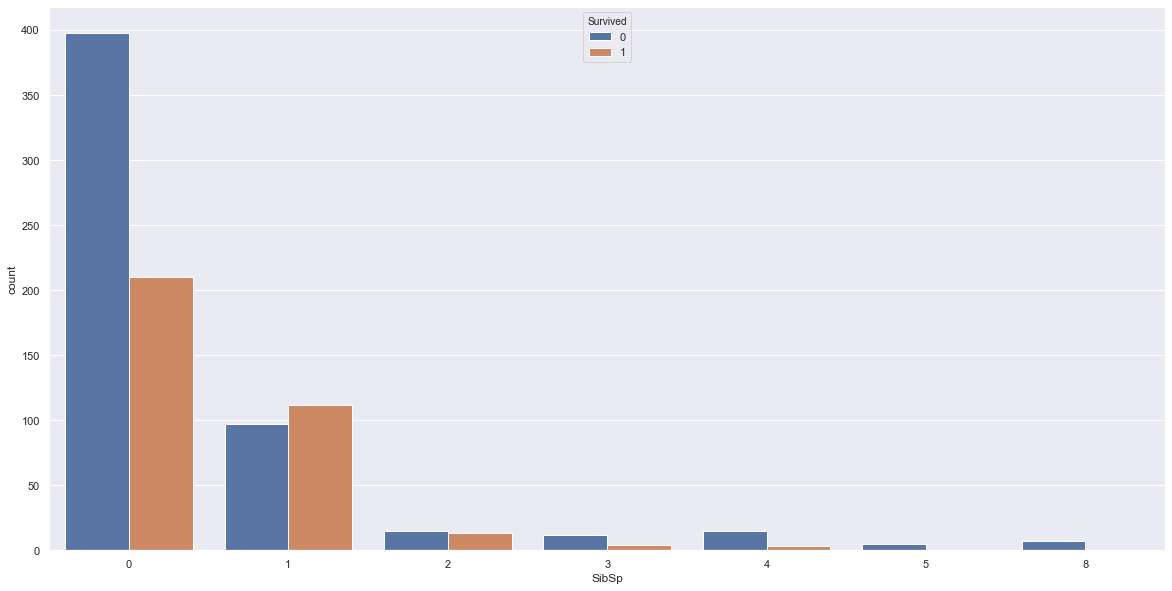

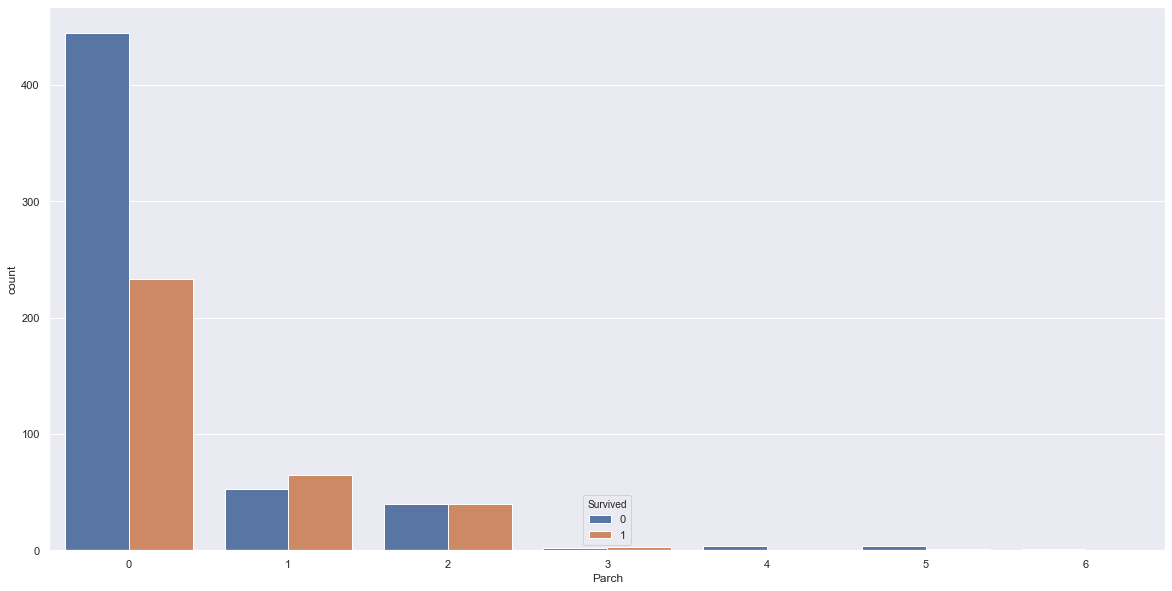

In [357]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.countplot(data=train_data, x="SibSp", hue="Survived")
plt.show()
sns.countplot(data=train_data, x="Parch", hue="Survived",)
plt.show()

In [371]:
data = train_data.copy()

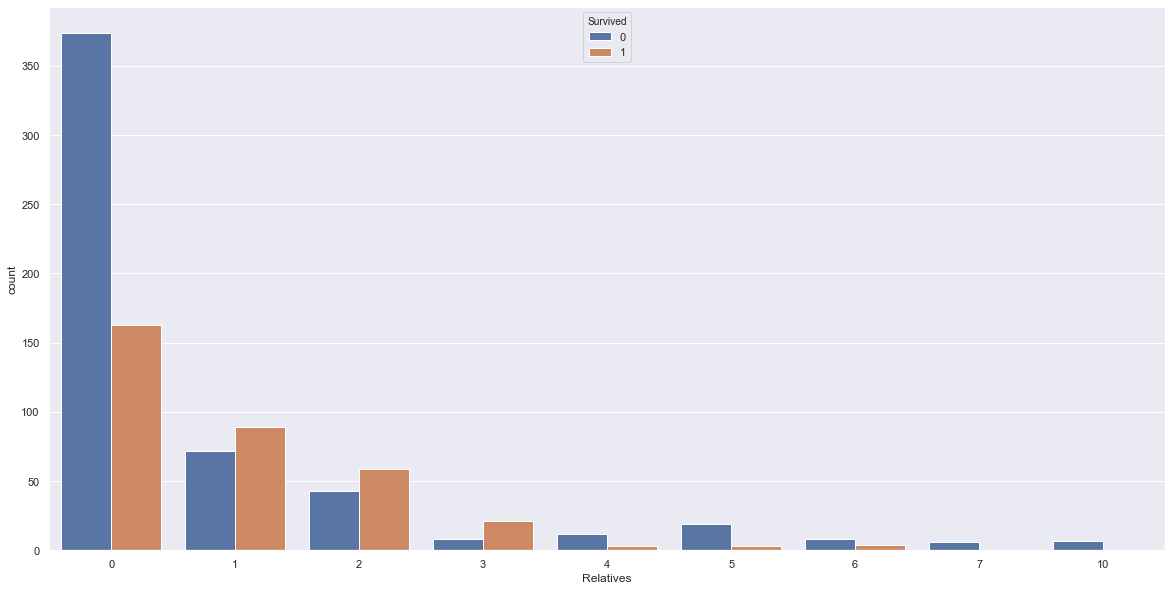

In [372]:
data["Relatives"] = data["Parch"] + data["SibSp"]
sns.countplot(data=data, x="Relatives", hue="Survived",)
plt.show()

Interesting insight: 
- People who boarded without relatives had around 30% chance of surviving 
- People with 1 to 3 relatives had a higher chance of surviving than 50%
- People with over 3 relatives had a very low chance of suurviving

In [374]:
class sum_relatives(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_new = X.copy()
        X_new["Relatives"] = X_new["Parch"] + X_new["SibSp"]
        return X_new

### Exploration of Cabin and Ticket Feature

In [377]:
train_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [405]:
train_data["Cabin_prefix"] = train_data["Cabin"].str.replace('\d+', '')
train_data["Cabin_prefix"] = train_data["Cabin_prefix"].str.split(' ').str[0]
#train_data["Cabin_prefix"].fillna("Missing", inplace=True)

In [406]:
train_data["Cabin_prefix"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

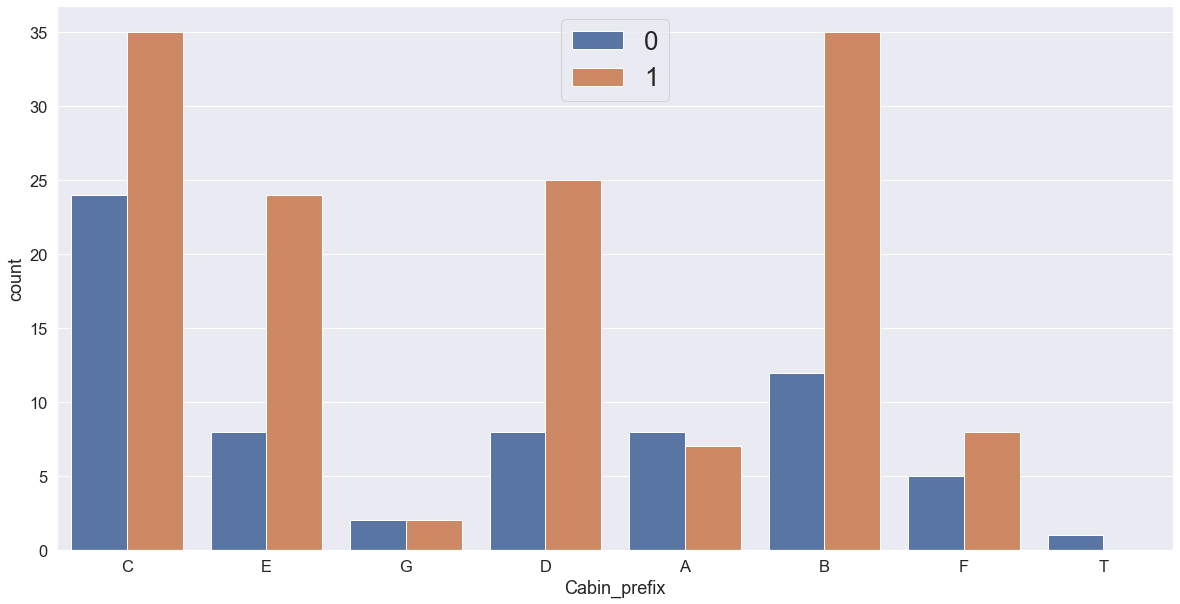

In [407]:
sns.countplot(data=train_data, x="Cabin_prefix", hue="Survived",)
plt.legend(fontsize="x-large")
plt.show()

Fill NA cabins in a logical way?

In [375]:
# Added transformers
feature_engineering = Pipeline([
        ("extract_titles", extract_titles),
        ("sum_relatives", sum_relatives)
    ])

In [253]:
num_pipeline_improved = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare", "Relatives"])),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [254]:
cat_pipeline_improved = Pipeline([
        ("select_cat", DataFrameSelector(["Sex", "Embarked", "Pclass", "Title"])),
        ("imputer", MostFrequentImputer()),
        ("onehot", OneHot())
    ])

In [255]:
preprocess_pipeline_improved = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_improved),
        ("cat_pipeline", cat_pipeline_improved)
    ])

In [260]:
# Full Pipeline
prepare_predict_pipeline_improved = Pipeline([
    ("feature_engineer", extract_titles),
    ("prepare", preprocess_pipeline_improved)
    ]) 